In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        # How many Layers are there?
        
        # Input Layer -> h1 -> h2 -> output
        # 4 Features hidden -> h1 N -> h2 N --> output (3 classes)
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../Data/iris.csv")

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


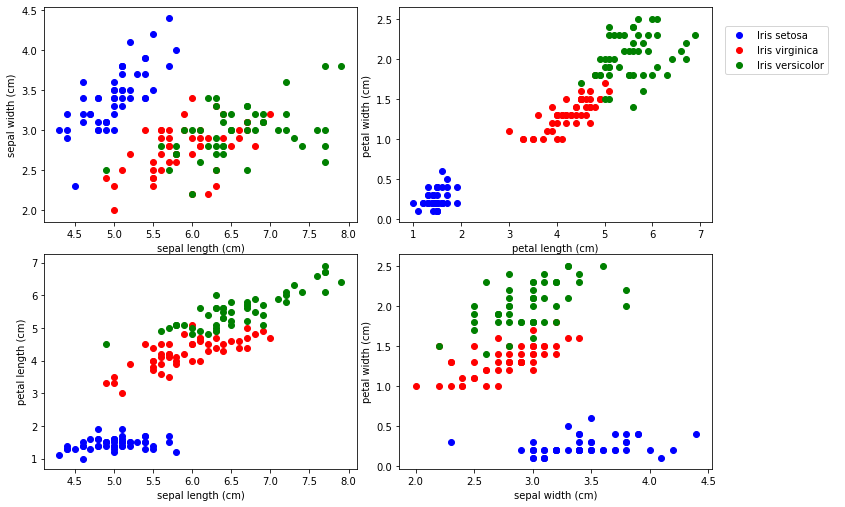

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [9]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
# EPOCHS
# An epoch is 1 run through all the training data

epochs = 100
losses = []

for epoch in range(epochs):
    # Forward and get a prediction
    y_pred = model(X_train)
    
    # calculate the loss
    #    Since we are using Cross Entropy Loss, we do not need to do One Hot Encoding Vectors
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if (epoch+1) % 10 == 0 :
        print('Epoch [{}/{}]. Loss : {:.3f}'.format(epoch+1, epochs, loss))
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

Epoch [10/100]. Loss : 0.957
Epoch [20/100]. Loss : 0.792
Epoch [30/100]. Loss : 0.632
Epoch [40/100]. Loss : 0.419
Epoch [50/100]. Loss : 0.267
Epoch [60/100]. Loss : 0.158
Epoch [70/100]. Loss : 0.104
Epoch [80/100]. Loss : 0.083
Epoch [90/100]. Loss : 0.073
Epoch [100/100]. Loss : 0.068


Text(0.5, 0, 'Epochs')

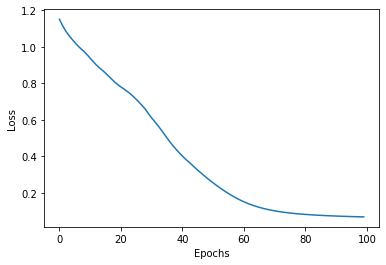

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

Validate the model

In [18]:
with torch.no_grad(): # speeds up the computation
    y_eval = model(X_test)
    loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.0581)

In [26]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        
        y_val = model(data)
        
        print('{}) {} {}'.format(i+1,str(y_val.argmax().numpy()),y_test[i]))
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print('We got {}/{} correct!'.format(correct, y_test.shape[0]))

1) 1 1
2) 1 1
3) 0 0
4) 1 1
5) 2 2
6) 2 2
7) 0 0
8) 0 0
9) 2 2
10) 2 2
11) 2 2
12) 0 0
13) 2 2
14) 1 1
15) 2 2
16) 1 1
17) 2 2
18) 0 0
19) 1 1
20) 2 2
21) 0 0
22) 0 0
23) 2 2
24) 0 0
25) 2 2
26) 2 2
27) 1 1
28) 1 1
29) 2 2
30) 2 2
We got 30/30 correct!


Save the train model

In [27]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [28]:
new_model = Model() # No idea what weights and biases should b
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [29]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
# if you want to save everything including parameters and its class
torch.save(model,'my_iris_model.pt')
new_model.load_state_dict(torch.load('my_iris_model.pt'))

In [34]:
mystery_iris = torch.tensor([5.6,3.7,2.2,.5])

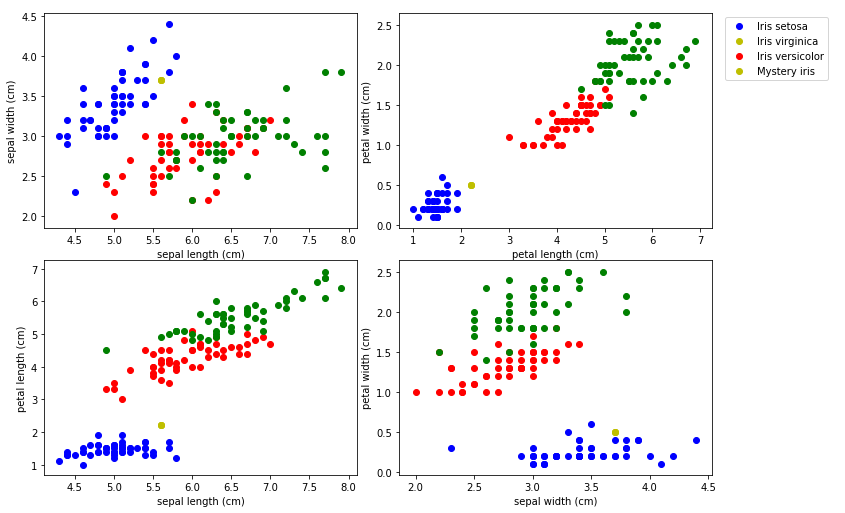

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
        ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y', label='Mystery Iris')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [40]:
with torch.no_grad():
    print(new_model(mysteris_iris).argmax().item())

0
